In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv("World_Happiness_2015.csv")
file

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
file.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
file.rename({'Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health', 'Trust (Government Corruption)':'Trust'}, inplace=True, axis=1)
file.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
cols = ["Economy", "Family","Health","Freedom","Generosity"]
file[cols].head()

,Economy,Family,Health,Freedom,Generosity
0,1.39651,1.34951,0.94143,0.66557,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.45811


In [8]:
def label(element):
    if element > 1:
        return "High"
    else:
        return "Low"
#label(0.3223)

'Low'

In [10]:
#file["Economy"].astype(int)


1. Map
2. Apply 
only work on series, (column or row)
have to pass function as attribute

In [20]:
a = file["Economy"].apply(label)
#a

In [21]:
b = file["Economy"].apply(label)
#b

In [19]:
a.equals(b) #hence map and apply working as same in this example

True

In [23]:
def label1(element,x):
    if element > x:
        return "High"
    else:
        return "Low"
#label1(0.3223,0)

'High'

In [32]:
#file["Economy"].map(label1,x=0) 
file["Economy"].apply(label1,x=0).head() 

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

Map doesnt work with two parameters but apply does.

3.Applymap 
works on dataframes

In [46]:
df = file[cols].applymap(label).head() #performs same function on all columns simultaneously
df

,Economy,Family,Health,Freedom,Generosity
0,High,High,Low,Low,Low
1,High,High,Low,Low,Low
2,High,High,Low,Low,Low
3,High,High,Low,Low,Low
4,High,High,Low,Low,Low


In [34]:
file[cols].apply(sum) #by default axis=0, it can be changed to 1 to give index-wise results

Economy       133.68968
Family        156.58526
Health         99.58098
Freedom        67.72116
Generosity     37.49269
dtype: float64

Any function for eg. sum which reduces the dataframe to return single values can be passed in apply!

In [48]:
def perc(col):
    value = col.value_counts()
    total_len = col.size()
    return (value/total_len)*100
#df.applymap(perc)


In [65]:
factor = ["Economy", "Family","Health","Freedom","Trust","Generosity","Dystopia Residual"]
file["Factor Sum"] = round(file[factor].apply(sum, axis=1),3)
file.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Factor Sum
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [66]:
y = file["Factor Sum"]
z = (file["Happiness Score"]
y.equals(z)
#diff = y - z
#diff

SyntaxError: invalid syntax (<ipython-input-66-58f19f5e1b55>, line 3)

In [68]:
def percentage(col): #finding out what % each factor contributes to in happiness score
    a = file["Happiness Score"]
    return (col/a)*100   

In [73]:
file[factor].apply(percentage).apply(sum,axis=1).head() #sum of all %'s equal to 100 approx

0     99.999473
1     99.998942
2    100.001063
3    100.002925
4     99.999192
dtype: float64

In [90]:
main = ["Country","Region","Happiness Rank","Happiness Score"]
melt = file.melt(id_vars=main,value_vars=factor) #id_vars: all columns which remain same
melt.pivot_table(index="variable", values="value")


,value
variable,
Dystopia Residual,2.098977
Economy,0.846137
Family,0.991046
Freedom,0.428615
Generosity,0.237296
Health,0.630259
Trust,0.143422


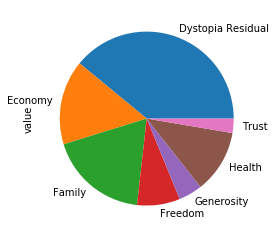

In [96]:
melt.groupby("variable")["value"].mean().plot.pie()